In [361]:
import pandas as pd

In [362]:
# Loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

In [363]:
df.columns

Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'engagement',
       'nr_likes', 'link_posts', 'picture_posts', 'video_posts', 'profile_id',
       'post_id', 'link', 'followers', 'weighted_engagement'],
      dtype='object')

In [364]:
df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,41
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,34
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,618
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,22
15439,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,9
15440,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,794
15441,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,69


Import excel with the themeparks and timezones

In [365]:
import pandas as pd

# Loading our cleaned dataset
timeDf = pd.read_excel('Timezones.xlsx')

# Display the DataFrame
timeDf

,Profile,Timezone
0,Wild Adventures Theme Park,ET: 6 hours
1,Fun Spot America,ET: 6 hours
2,Silverwood Theme Park,PT: 9 hours
3,Belmont Park,PT: 9 hours
4,SeaWorld Orlando,ET: 6 hours
5,SeaWorld San Diego,PT: 9 hours
6,Lake Compounce,ET: 6 hours
7,Happy Hollow Park & Zoo,PT: 9 hours
8,Universal Orlando Resort (US),ET: 6 hours
9,Busch Gardens Tampa Bay,ET: 6 hours


In [366]:
# Split the 'Timezone' column and extract the number of hours
timeDf['Difference'] = timeDf['Timezone'].str.split(':').str[-1].str.strip().str.extract('(\d+)').astype(int)

# Display the updated dataframe
timeDf

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\matth\AppData\Local\Temp\ipykernel_17436\2307643195.py:2: SyntaxWarning: invalid escape sequence '\d'
  timeDf['Difference'] = timeDf['Timezone'].str.split(':').str[-1].str.strip().str.extract('(\d+)').astype(int)


,Profile,Timezone,Difference
0,Wild Adventures Theme Park,ET: 6 hours,6
1,Fun Spot America,ET: 6 hours,6
2,Silverwood Theme Park,PT: 9 hours,9
3,Belmont Park,PT: 9 hours,9
4,SeaWorld Orlando,ET: 6 hours,6
5,SeaWorld San Diego,PT: 9 hours,9
6,Lake Compounce,ET: 6 hours,6
7,Happy Hollow Park & Zoo,PT: 9 hours,9
8,Universal Orlando Resort (US),ET: 6 hours,6
9,Busch Gardens Tampa Bay,ET: 6 hours,6


In [367]:
# Assuming merged_df is your DataFrame
timeDf.rename(columns={'Profile': 'profile'}, inplace=True)

# Now 'Profile' column is changed to 'profile'
print(timeDf.head())


                      profile     Timezone  Difference
0  Wild Adventures Theme Park  ET: 6 hours           6
1            Fun Spot America  ET: 6 hours           6
2       Silverwood Theme Park  PT: 9 hours           9
3                Belmont Park  PT: 9 hours           9
4            SeaWorld Orlando  ET: 6 hours           6


In [368]:
# Assuming merged_df is your DataFrame
timeDf.rename(columns={'Date': 'date'}, inplace=True)

# Now 'Profile' column is changed to 'profile'
print(timeDf.head())


                      profile     Timezone  Difference
0  Wild Adventures Theme Park  ET: 6 hours           6
1            Fun Spot America  ET: 6 hours           6
2       Silverwood Theme Park  PT: 9 hours           9
3                Belmont Park  PT: 9 hours           9
4            SeaWorld Orlando  ET: 6 hours           6


In [369]:
# Check for Matching Profiles
print(set(df['profile']).difference(set(timeDf['profile'])))
print(set(timeDf['profile']).difference(set(df['profile'])))

# Trim Spaces
df['profile'] = df['profile'].str.strip()
timeDf['profile'] = timeDf['profile'].str.strip()

# Check for Case Sensitivity
df['profile'] = df['profile'].str.lower()
timeDf['profile'] = timeDf['profile'].str.lower()

{"acn - america's coaster network", 'hersheypark', 'centreville amusement park', 'universal orlando resort (us)', 'six flags great escape and hurricane harbor', 'disneyland paris', "santa's workshop north pole, colorado", 'seaworld san diego', 'six flags discovery kingdom', 'west edmonton mall', 'walt disney studios (us)', 'six flags over georgia & hurricane harbor', 'adventure city', 'seaworld orlando', 'six flags great adventure', 'sesame place san diego', 'playland', 'six flags', 'legoland california', 'six flags magic mountain', 'elitch gardens', 'hurricane harbor oklahoma city', 'universal studios hollywood', 'walt disney world', 'kings island', 'six flags great america/hurricane harbor', "big kahuna's nj", 'lake winnie', 'calaway park', 'enchanted island amusement park', 'santa cruz beach boardwalk', 'castles n coasters', 'pacific park', 'seaworld', 'marineland', 'cedar point', 'waterville usa', 'glenwood caverns adventure park', 'walt disney animation studios', "canada's wonderl

In [370]:
# Merge dataframes on 'profile'
merged_df = pd.merge(df, timeDf, on='profile', how='left')


merged_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,Timezone,Difference
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,ET: 6 hours,6.0
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,41,ET: 6 hours,6.0
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,34,ET: 6 hours,6.0
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,618,NaN,NaN
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,20,PT: 9 hours,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,22,ET: 6 hours,6.0
15439,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,9,ET: 6 hours,6.0
15440,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,794,NaN,NaN
15441,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,69,ET: 6 hours,6.0


In [371]:
# Convert the 'Date' column to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Adjust the time based on the 'Difference' column
merged_df['date'] -= pd.to_timedelta(merged_df['Difference'].fillna(0), unit='h')

# Display the updated dataframe
merged_df

C:\Users\matth\AppData\Local\Temp\ipykernel_17436\4030113111.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['date'] = pd.to_datetime(merged_df['date'])


,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,Timezone,Difference
0,2023-12-31 15:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,ET: 6 hours,6.0
1,2023-12-31 14:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,41,ET: 6 hours,6.0
2,2023-12-31 13:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,34,ET: 6 hours,6.0
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,618,NaN,NaN
4,2023-12-31 10:00:00,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,20,PT: 9 hours,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2022-12-31 20:00:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,22,ET: 6 hours,6.0
15439,2022-12-31 19:20:00,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,9,ET: 6 hours,6.0
15440,2023-01-01 00:01:00,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,794,NaN,NaN
15441,2022-12-31 18:00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,69,ET: 6 hours,6.0


In [372]:
# Extract the 'Date' column
date_column = merged_df['date']

# Display the 'Date' column
print(date_column)

0       2023-12-31 15:40:00
1       2023-12-31 14:01:00
2       2023-12-31 13:30:00
3       2023-12-31 19:00:00
4       2023-12-31 10:00:00
                ...        
15438   2022-12-31 20:00:00
15439   2022-12-31 19:20:00
15440   2023-01-01 00:01:00
15441   2022-12-31 18:00:00
15442   2022-12-31 15:00:00
Name: date, Length: 15443, dtype: datetime64[ns]


Split up the time of day in morning, afternoon and evening

In [373]:
# Categorize dates into days of the week (Monday to Sunday)
merged_df['Day of Week'] = merged_df['date'].dt.strftime('%A')

# Categorize times into morning, afternoon, and evening
def categorize_time(time):
    if time.hour < 12:
        return 'Morning'
    elif time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply categorization to create a new column 'Time of Day'
merged_df['Time of Day'] = merged_df['date'].apply(categorize_time)

# Display the result
print(merged_df[['date', 'Day of Week', 'Time of Day']])


                     date Day of Week Time of Day
0     2023-12-31 15:40:00      Sunday   Afternoon
1     2023-12-31 14:01:00      Sunday   Afternoon
2     2023-12-31 13:30:00      Sunday   Afternoon
3     2023-12-31 19:00:00      Sunday     Evening
4     2023-12-31 10:00:00      Sunday     Morning
...                   ...         ...         ...
15438 2022-12-31 20:00:00    Saturday     Evening
15439 2022-12-31 19:20:00    Saturday     Evening
15440 2023-01-01 00:01:00      Sunday     Morning
15441 2022-12-31 18:00:00    Saturday     Evening
15442 2022-12-31 15:00:00    Saturday   Afternoon

[15443 rows x 3 columns]


In [374]:
# Count of unique values in the 'Time of Day' column
time_of_day_counts = merged_df['Time of Day'].value_counts()

# Print the count of unique values
print("Count of unique values in the 'Time of Day' column:")
print(time_of_day_counts)


Count of unique values in the 'Time of Day' column:
Time of Day
Morning      7220
Afternoon    6374
Evening      1849
Name: count, dtype: int64


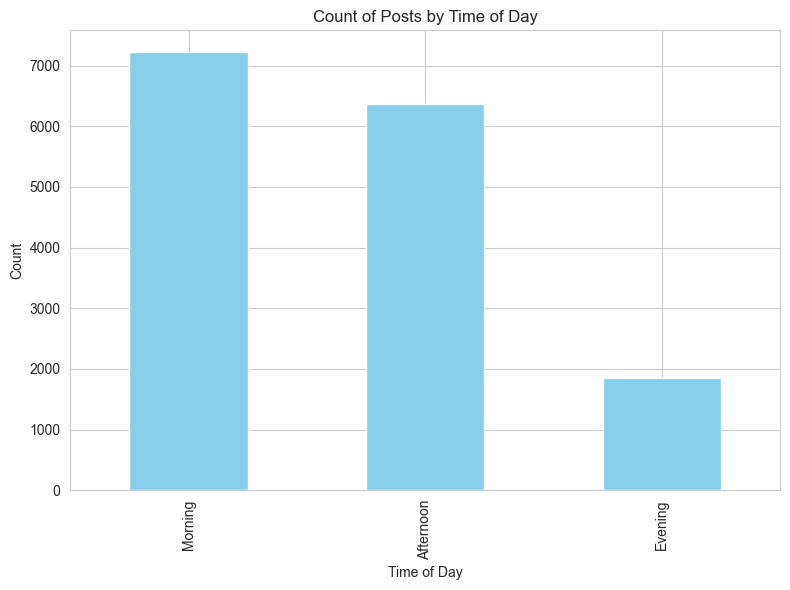

In [375]:
import matplotlib.pyplot as plt

# Count of unique values in the 'Time of Day' column
time_of_day_counts = merged_df['Time of Day'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
time_of_day_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Count of Posts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


Calculate the engagement

In [376]:
# Displaying the calculated engagement metric along with other relevant columns
print(merged_df[['date', 'profile', 'Time of Day', 'engagement']])

                     date                                    profile  \
0     2023-12-31 15:40:00                 wild adventures theme park   
1     2023-12-31 14:01:00                           fun spot america   
2     2023-12-31 13:30:00                           fun spot america   
3     2023-12-31 19:00:00                           disneyland paris   
4     2023-12-31 10:00:00                      silverwood theme park   
...                   ...                                        ...   
15438 2022-12-31 20:00:00                 wild adventures theme park   
15439 2022-12-31 19:20:00                                   playland   
15440 2023-01-01 00:01:00                           disneyland paris   
15441 2022-12-31 18:00:00  six flags over georgia & hurricane harbor   
15442 2022-12-31 15:00:00                         knott's berry farm   

      Time of Day    engagement  
0       Afternoon  1.090000e+12  
1       Afternoon  4.170000e+11  
2       Afternoon  2.850000e+11  

In [377]:
# Convert the column to string type
merged_df['engagement'] = merged_df['engagement'].astype(str)

# Replace comma with dot and convert to float
merged_df['engagement'] = merged_df['engagement'].str.replace(',', '.').astype(float)


In [378]:
# Print column names in the DataFrame
print(merged_df.columns)


Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'engagement',
       'nr_likes', 'link_posts', 'picture_posts', 'video_posts', 'profile_id',
       'post_id', 'link', 'followers', 'weighted_engagement', 'Timezone',
       'Difference', 'Day of Week', 'Time of Day'],
      dtype='object')


In [379]:
# Extract unique weekdays
unique_weekdays = merged_df['Day of Week'].unique()

# Display the unique weekdays
print("Unique Weekdays:")
for weekday in unique_weekdays:
    print(weekday)

Unique Weekdays:
Sunday
Saturday
Friday
Thursday
Wednesday
Tuesday
Monday


In [380]:
# Extract unique times of the day
unique_times_of_day = merged_df['Time of Day'].unique()

# Display the unique times of the day
print("Unique Times of Day:")
for time_of_day in unique_times_of_day:
    print(time_of_day)

Unique Times of Day:
Afternoon
Evening
Morning


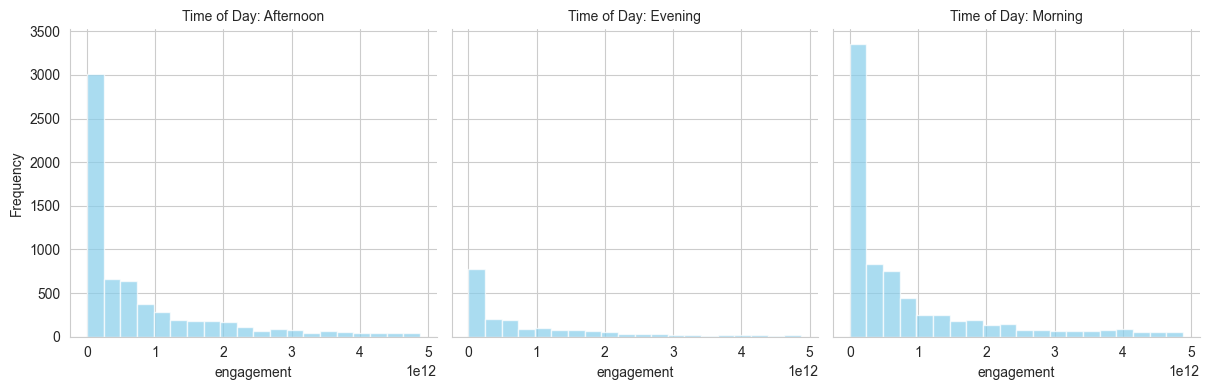

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Create a facet grid of histograms
g = sns.FacetGrid(merged_df, col='Time of Day', col_wrap=3, height=4)
g.map(plt.hist, 'engagement', bins=20, color='skyblue', alpha=0.7)

# Set labels and titles
g.set_axis_labels("engagement", "Frequency")
g.set_titles("Time of Day: {col_name}")

# Show the plot
plt.show()


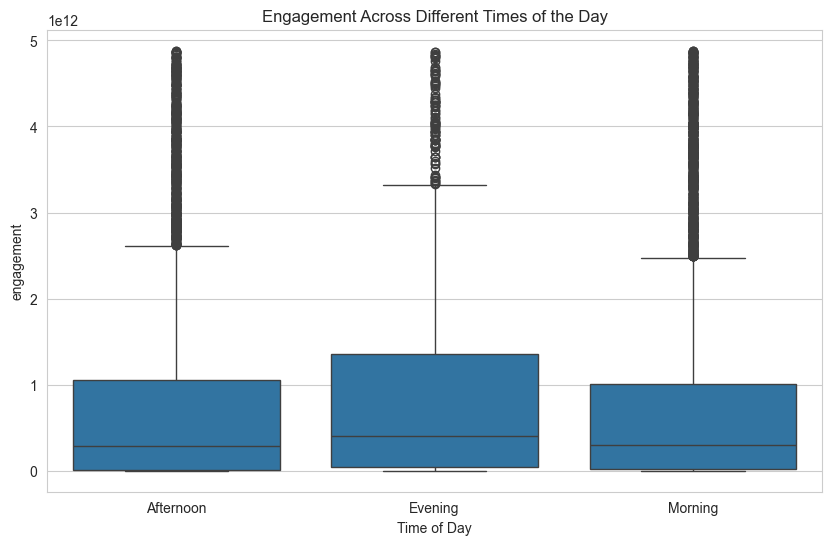

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time of Day', y='engagement', data=merged_df)
plt.title('Engagement Across Different Times of the Day')
plt.xlabel('Time of Day')
plt.ylabel('engagement')
plt.show()

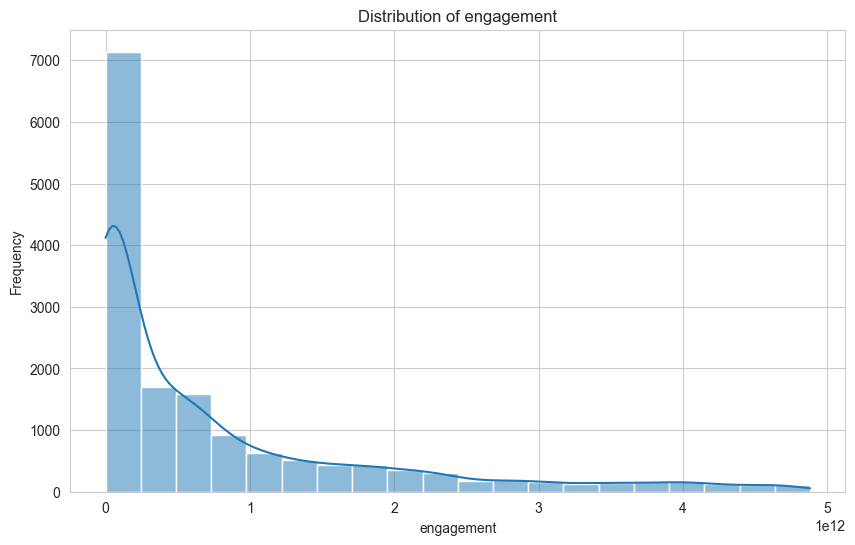

In [383]:
# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['engagement'], bins=20, kde=True)
plt.title('Distribution of engagement')
plt.xlabel('engagement')
plt.ylabel('Frequency')
plt.show()


Shapiro-Wilk test to see if the data is normally distributed

In [384]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
statistic, p_value = shapiro(merged_df['engagement'])

# Display the test result
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")


Shapiro-Wilk Test Results:
Test Statistic: 0.7344926595687866
p-value: 0.0
The data does not follow a normal distribution (reject the null hypothesis).


c:\Users\matth\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


levene test to look at the homogeneity of varianc

In [385]:
from scipy.stats import levene

# Levene's test for homogeneity of variance
statistic, p_value = levene(
    merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()
)

# Display the test result
print("Levene's Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value > alpha:
    print("The variances are approximately equal across groups (fail to reject the null hypothesis).")
else:
    print("The variances are significantly different across groups (reject the null hypothesis).")


Levene's Test Results:
Test Statistic: 4.111282213837583
p-value: 0.016404692259800752
The variances are significantly different across groups (reject the null hypothesis).


Anova test to check

In [386]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform ANOVA test
result_anova = f_oneway(
    merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()
)

# Display ANOVA test results
print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)

# Perform post hoc analysis (Tukey's HSD)
if result_anova.pvalue < 0.05:  # Check if ANOVA result is significant
    posthoc = pairwise_tukeyhsd(merged_df['engagement'], merged_df['Time of Day'], alpha=0.05)
    print("\nPost Hoc Analysis (Tukey's HSD):")
    print(posthoc)

    # Interpretation
    morning_vs_afternoon = posthoc.reject[0]  # Compare morning vs afternoon
    if morning_vs_afternoon:
        print("\nThere is a significant difference between morning and afternoon posts.")
    else:
        print("\nThere is no significant difference between morning and afternoon posts.")
else:
    print("\nNo significant difference among time periods.")


ANOVA Test Results:
F-statistic: 6.552715273578949
p-value: 0.0014302072964715007



Post Hoc Analysis (Tukey's HSD):
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
  group1   group2      meandiff     p-adj        lower              upper       reject
--------------------------------------------------------------------------------------
Afternoon Evening  99059492118.5829 0.0017   31601736695.3691 166517247541.7966   True
Afternoon Morning   2563392760.3121 0.9897  -41329098458.1213  46455883978.7455  False
  Evening Morning -96496099358.2708  0.002 -163059250426.1188 -29932948290.4227   True
--------------------------------------------------------------------------------------

There is a significant difference between morning and afternoon posts.


Welch Anova test

In [387]:
import pingouin as pg

# Perform Welch's ANOVA test
result_welch_anova = pg.welch_anova(
    data=merged_df,
    dv='engagement',
    between='Time of Day'
)

# Display Welch's ANOVA test results
print("Welch's ANOVA Test Results:")
print(result_welch_anova)


Welch's ANOVA Test Results:
        Source  ddof1       ddof2         F     p-unc       np2
0  Time of Day      2  5158.92565  6.291189  0.001867  0.000848


Kruskal-Wallis test to answer H1a

In [388]:
from scipy.stats import kruskal

# Define the engagement data for each time period
engagement_morning = merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna()
engagement_afternoon = merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna()
engagement_evening = merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()

# Perform Kruskal-Wallis test
result_kruskal = kruskal(engagement_morning, engagement_afternoon, engagement_evening)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Interpret the results
alpha = 0.05
if result_kruskal.pvalue < alpha:
    print("There is a significant difference in user engagement levels among posts made during different time periods (reject the null hypothesis).")
else:
    print("There is no significant difference in user engagement levels among posts made during different time periods (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 22.74887904927261
p-value: 1.1485335334587022e-05
There is a significant difference in user engagement levels among posts made during different time periods (reject the null hypothesis).


In [389]:
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Kruskal-Wallis test
result_kruskal = kruskal(
    merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()
)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Perform pairwise comparisons using Mann-Whitney U test with Bonferroni correction
alpha = 0.05
n_groups = len(time_periods)
pairwise_comparisons = list(combinations(time_periods, 2))
for group1, group2 in pairwise_comparisons:
    group1_data = merged_df[merged_df['Time of Day'] == group1]['engagement'].dropna()
    group2_data = merged_df[merged_df['Time of Day'] == group2]['engagement'].dropna()
    
    # Perform Mann-Whitney U test
    result_mannwhitney = mannwhitneyu(group1_data, group2_data)
    
    # Apply Bonferroni correction to the significance level
    adjusted_alpha = alpha / len(pairwise_comparisons)
    
    # Display pairwise comparison results
    print(f"\nPairwise Comparison: {group1} vs {group2}")
    print("U-statistic:", result_mannwhitney.statistic)
    print("p-value:", result_mannwhitney.pvalue)
    if result_mannwhitney.pvalue < adjusted_alpha:
        print("The difference is statistically significant (reject the null hypothesis).")
    else:
        print("There is no statistically significant difference (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 22.74887904927261
p-value: 1.1485335334587022e-05

Pairwise Comparison: Morning vs Afternoon
U-statistic: 23058633.0
p-value: 0.8318153634029462
There is no statistically significant difference (fail to reject the null hypothesis).

Pairwise Comparison: Morning vs Evening
U-statistic: 6227116.5
p-value: 8.285495186559066e-06
The difference is statistically significant (reject the null hypothesis).

Pairwise Comparison: Afternoon vs Evening
U-statistic: 5483562.0
p-value: 5.285133784850102e-06
The difference is statistically significant (reject the null hypothesis).


Mann-Whitney U test to answer H1b

In [390]:
from scipy.stats import mannwhitneyu

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Mann-Whitney U tests for each pair of time periods
for i in range(len(time_periods)):
    for j in range(i+1, len(time_periods)):
        # Select engagement data for the current pair of time periods
        data_1 = merged_df[merged_df['Time of Day'] == time_periods[i]]['engagement'].dropna()
        data_2 = merged_df[merged_df['Time of Day'] == time_periods[j]]['engagement'].dropna()
        
        # Perform Mann-Whitney U test
        result = mannwhitneyu(data_1, data_2)
        
        # Display Mann-Whitney U test results
        print(f"Mann-Whitney U Test Results for {time_periods[i]} vs {time_periods[j]}:")
        print("U-statistic:", result.statistic)
        print("p-value:", result.pvalue)
        
        # Determine if the test passes or fails based on the significance level (e.g., 0.05)
        alpha = 0.05
        if result.pvalue < alpha:
            print("The difference is statistically significant (reject the null hypothesis).")
        else:
            print("There is no statistically significant difference (fail to reject the null hypothesis).")
        print()


Mann-Whitney U Test Results for Morning vs Afternoon:
U-statistic: 23058633.0
p-value: 0.8318153634029462
There is no statistically significant difference (fail to reject the null hypothesis).

Mann-Whitney U Test Results for Morning vs Evening:
U-statistic: 6227116.5
p-value: 8.285495186559066e-06
The difference is statistically significant (reject the null hypothesis).

Mann-Whitney U Test Results for Afternoon vs Evening:
U-statistic: 5483562.0
p-value: 5.285133784850102e-06
The difference is statistically significant (reject the null hypothesis).



In [391]:
from scipy.stats import mannwhitneyu
import numpy as np

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Define a function to calculate the Common Language Effect Size
def cles_ind(x1, x2):
    """Calculate Common Language Effect Size Indicator for independent groups.
    Arguments:
    x1, x2: Arrays of values for two groups
    Returns:
    cles: Common Language Effect Size
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    diff = x1[:, None] - x2
    cles = (diff > 0).sum() / diff.size
    return cles

# Perform Mann-Whitney U tests for each pair of time periods
for i in range(len(time_periods)):
    for j in range(i+1, len(time_periods)):
        # Select engagement data for the current pair of time periods
        data_1 = merged_df[merged_df['Time of Day'] == time_periods[i]]['engagement'].dropna()
        data_2 = merged_df[merged_df['Time of Day'] == time_periods[j]]['engagement'].dropna()
        
        # Perform Mann-Whitney U test
        result = mannwhitneyu(data_1, data_2)
        
        # Display Mann-Whitney U test results
        print(f"Mann-Whitney U Test Results for {time_periods[i]} vs {time_periods[j]}:")
        print("U-statistic:", result.statistic)
        print("p-value:", result.pvalue)
        
        # Determine if the test passes or fails based on the significance level (e.g., 0.05)
        alpha = 0.05
        if result.pvalue < alpha:
            print("The difference is statistically significant (reject the null hypothesis).")
        else:
            print("There is no statistically significant difference (fail to reject the null hypothesis).")
        print()
        
        # Calculate the Common Language Effect Size
        cles = cles_ind(data_1, data_2)
        print("Common Language Effect Size:", cles)
        print()


Mann-Whitney U Test Results for Morning vs Afternoon:
U-statistic: 23058633.0
p-value: 0.8318153634029462
There is no statistically significant difference (fail to reject the null hypothesis).

Common Language Effect Size:

 0.5008300036418727

Mann-Whitney U Test Results for Morning vs Evening:
U-statistic: 6227116.5
p-value: 8.285495186559066e-06
The difference is statistically significant (reject the null hypothesis).

Common Language Effect Size: 0.4662126267249348

Mann-Whitney U Test Results for Afternoon vs Evening:
U-statistic: 5483562.0
p-value: 5.285133784850102e-06
The difference is statistically significant (reject the null hypothesis).

Common Language Effect Size: 0.46502158664789334



In [392]:
merged_df.head()

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,video_posts,profile_id,post_id,link,followers,weighted_engagement,Timezone,Difference,Day of Week,Time of Day
0,2023-12-31 15:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,ET: 6 hours,6.0,Sunday,Afternoon
1,2023-12-31 14:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,...,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,41,ET: 6 hours,6.0,Sunday,Afternoon
2,2023-12-31 13:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,...,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,34,ET: 6 hours,6.0,Sunday,Afternoon
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,...,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,618,NaN,NaN,Sunday,Evening
4,2023-12-31 10:00:00,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,...,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,20,PT: 9 hours,9.0,Sunday,Morning


In [393]:
merged_df.rename(columns={'Day of Week': 'day_of_week', 'Time of Day': 'time_of_day'}, inplace=True)


In [394]:
merged_df.columns

Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'engagement',
       'nr_likes', 'link_posts', 'picture_posts', 'video_posts', 'profile_id',
       'post_id', 'link', 'followers', 'weighted_engagement', 'Timezone',
       'Difference', 'day_of_week', 'time_of_day'],
      dtype='object')

In [395]:
df = merged_df
df.columns


Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'engagement',
       'nr_likes', 'link_posts', 'picture_posts', 'video_posts', 'profile_id',
       'post_id', 'link', 'followers', 'weighted_engagement', 'Timezone',
       'Difference', 'day_of_week', 'time_of_day'],
      dtype='object')

## *Exporting the dataframe for further analysis*
To work on our multilevel analysis, we will now create a new csv version of the dataframe, which includes the two features that have been created in this notebook (has_emoji, emoji_type).

In [396]:
import os

# Get the directory of the current Jupyter Notebook file
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Specify the name of the folder within the repository
folder_name = '02_new dataframes'

# Construct the full path to the folder within the repository
folder_path = os.path.join(notebook_directory, folder_name)

# Define the file path for the CSV file within the folder
csv_file_path = os.path.join(folder_path, 'H1_dataframe.csv')

# Save the updated DataFrame to a CSV file in the specified folder
df.to_csv(csv_file_path, index=False)